<a href="https://colab.research.google.com/github/tago893/capstone/blob/main/Day1/EdaOnTsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 3.4 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 221.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 202.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 186.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

# download dataframe
data = pdr.get_data_yahoo("ETH-USD")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-01-13 00:00:00+00:00,1417.946167,1461.672729,1404.023926,1451.614868,1451.614868,7684148212
2023-01-14 00:00:00+00:00,1451.428467,1563.739136,1450.988403,1550.706909,1550.706909,15444626014
2023-01-15 00:00:00+00:00,1550.731567,1556.950806,1520.893799,1552.479492,1552.479492,6774614499


# VISUALIZATION


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

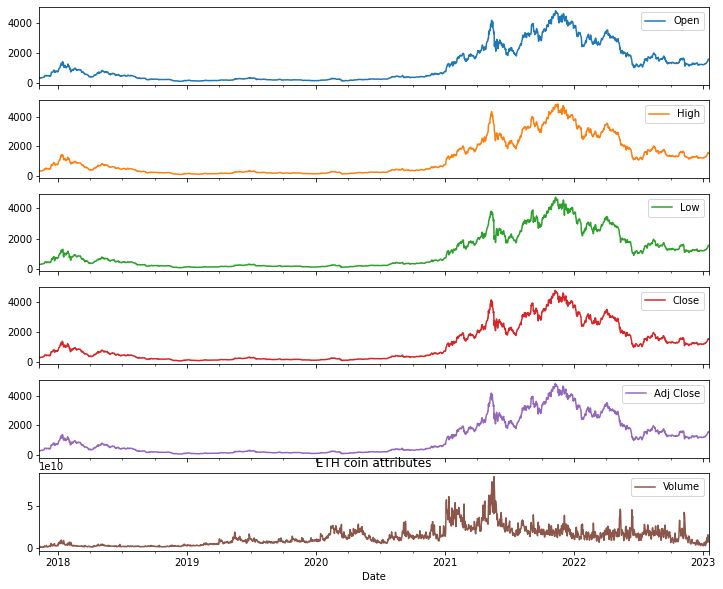

In [ ]:
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
data[selected_columns].plot(subplots=True, figsize=(12,10))
plt.title('ETH coin attributes')
plt.show()

In [ ]:
df2=pdr.get_data_yahoo("ETH-USD",end="2022-12-31")
del df2["Adj Close"]


[*********************100%***********************]  1 of 1 completed


In [ ]:
df2

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2022-12-26 00:00:00+00:00,1218.920166,1226.974365,1214.335938,1226.974365,3282098400
2022-12-27 00:00:00+00:00,1226.987061,1230.418091,1205.895630,1212.791626,4091530737
2022-12-28 00:00:00+00:00,1212.736572,1213.128906,1185.702148,1189.986084,4991669631


In [ ]:
df2.index

DatetimeIndex(['2017-11-09 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               '2017-11-11 00:00:00+00:00', '2017-11-12 00:00:00+00:00',
               '2017-11-13 00:00:00+00:00', '2017-11-14 00:00:00+00:00',
               '2017-11-15 00:00:00+00:00', '2017-11-16 00:00:00+00:00',
               '2017-11-17 00:00:00+00:00', '2017-11-18 00:00:00+00:00',
               ...
               '2022-12-21 00:00:00+00:00', '2022-12-22 00:00:00+00:00',
               '2022-12-23 00:00:00+00:00', '2022-12-24 00:00:00+00:00',
               '2022-12-25 00:00:00+00:00', '2022-12-26 00:00:00+00:00',
               '2022-12-27 00:00:00+00:00', '2022-12-28 00:00:00+00:00',
               '2022-12-29 00:00:00+00:00', '2022-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1878, freq=None)

In [ ]:
df2.describe()

,Open,High,Low,Close,Volume
count,1878.000000,1878.000000,1878.000000,1878.000000,1.878000e+03
mean,1129.623133,1165.957541,1088.267687,1129.866214,1.290502e+10
std,1188.875961,1225.196969,1146.809509,1188.248177,1.078973e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,211.154552,216.100323,206.291225,211.273056,4.482132e+09
50%,501.859009,522.925995,487.873993,502.186005,1.063680e+10
75%,1778.226990,1818.347504,1707.129456,1776.031830,1.819766e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


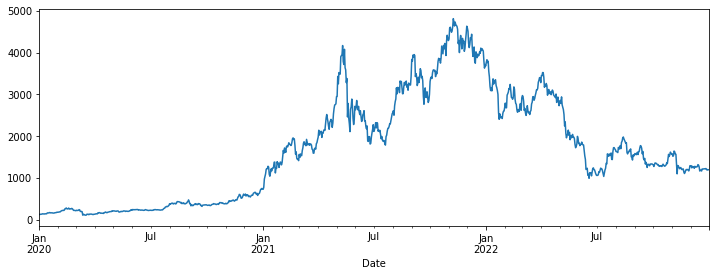

In [ ]:
df2['Close'].plot(xlim=['01-01-2020','31-12-2022'],figsize=(12,4))

# **Re-sampling:**
Resampling is a series of techniques used in statistics to gather additional information about a sample. This may involve re-sampling or estimating its accuracy.

Techniques used are mentioned below:


**1) Year end Frequency of the closing price**

This plot helps us visualize the max and min values of years helping us
infering that:

1. Year 2021 has the maximum closing price by the end of the year

2.  Year 2018 has the minimum closing price by the end of the year

3. From year 2018 to 2020 there has been a constant value of closing price and in 2022 the low price has increased and max price has gone down a bit compared to
2021  

In [ ]:
df2.resample(rule='A').max()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-31 00:00:00+00:00,827.515991,881.943970,792.689026,826.822998,5179829760
2018-12-31 00:00:00+00:00,1397.479980,1432.880005,1290.599976,1396.420044,9214950400
2019-12-31 00:00:00+00:00,336.959900,361.398682,315.954865,336.753174,18661465873
2020-12-31 00:00:00+00:00,751.626648,754.303223,726.511902,751.618958,31421134556
2021-12-31 00:00:00+00:00,4810.071289,4891.704590,4718.039062,4812.087402,84482912776
2022-12-31 00:00:00+00:00,3829.535645,3876.785156,3727.357422,3829.564941,45743399154


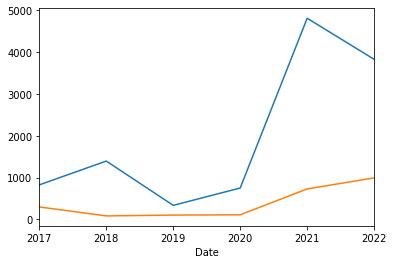

In [ ]:
#Yearly end frequency for max value
df2.resample(rule='A').max()['Close'].plot()
#Yearly end frequency for min value
df2.resample(rule='A').min()['Close'].plot()

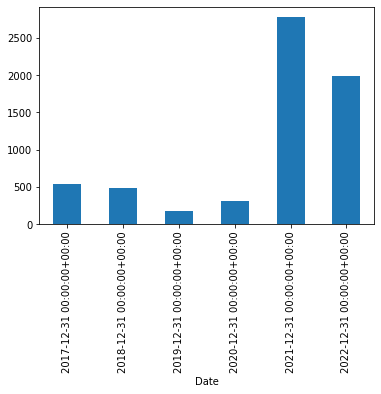

In [ ]:
df2['Close'].resample(rule='A').mean().plot(kind="bar")

**2) Quaterly End Frequency of the closing price**

This plot helps us visualize the max and min values of quaterly year helping us
infering that:

1. Year 2021 has the high maximum price as well as high minimum price compared to other years
2. From year 2019 to 2020 the max and min values of Eth are near but after a gap is visible for the closing price.

In [ ]:
df2.resample(rule="QS").max()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-01 00:00:00+00:00,827.515991,881.943970,792.689026,826.822998,5179829760
2018-01-01 00:00:00+00:00,1397.479980,1432.880005,1290.599976,1396.420044,9214950400
2018-04-01 00:00:00+00:00,816.088013,835.057007,784.237000,816.119995,4316120064
2018-07-01 00:00:00+00:00,500.838013,513.432983,488.416992,501.002014,2836200000
2018-10-01 00:00:00+00:00,233.220001,234.145004,226.945007,230.768005,4370343387
2019-01-01 00:00:00+00:00,158.902405,165.549622,154.337418,158.795425,5957715043
2019-04-01 00:00:00+00:00,336.959900,361.398682,315.954865,336.753174,18661465873
2019-07-01 00:00:00+00:00,313.325165,318.223114,305.285828,313.251404,11757739233
2019-10-01 00:00:00+00:00,193.191071,195.942505,188.667679,193.293259,13831784986


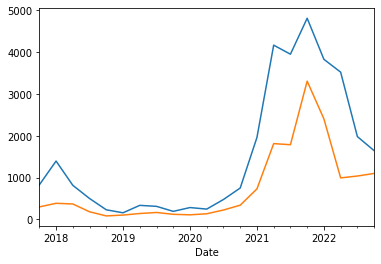

In [ ]:
#Quaterly end frequency for max value
df2.resample(rule='QS').max()['Close'].plot()
#Quaterly end frequency for min value
df2.resample(rule='QS').min()['Close'].plot()

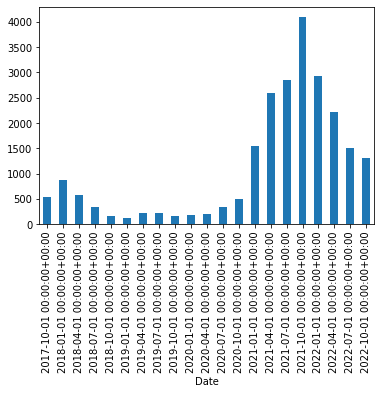

In [ ]:
df2['Close'].resample(rule='QS').mean().plot(kind="bar")

**3) Monthly end frequency of the closing price**

This plot helps us visualize the max and min values of monthly helping us
infering that:

1. Year 2021 has the high maximum price and 2018 has high minimum price compared to other years
2. From year 2019 to 2020 the max and min values of Eth closing price are near.

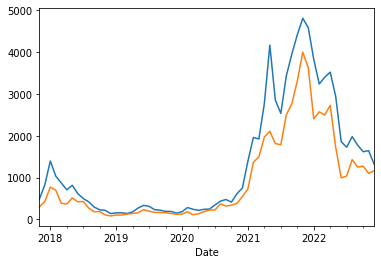

In [ ]:
#Monthly end frequency for max value
df2.resample(rule='M').max()['Close'].plot()
#Monthly end frequency for min value
df2.resample(rule='M').min()['Close'].plot()

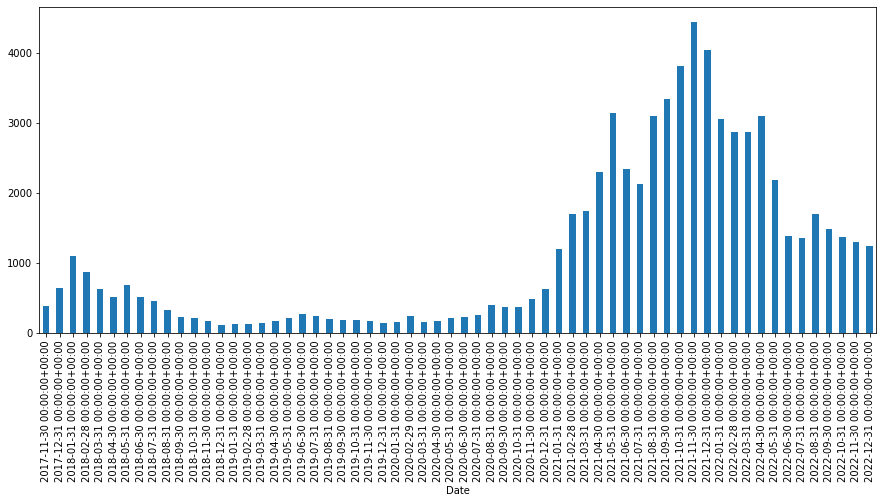

In [ ]:
df2['Close'].resample(rule='M').mean().plot(kind="bar",figsize=(15,6))

# Stationarity

a) Stationarity check

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df2['Close'])

ADF Statistics: -1.408567664365911
p- value: 0.5781618499447272
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
